In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn import preprocessing


## Part1. Analyze results of three types of regression models applied in predicting ads effectiveness 

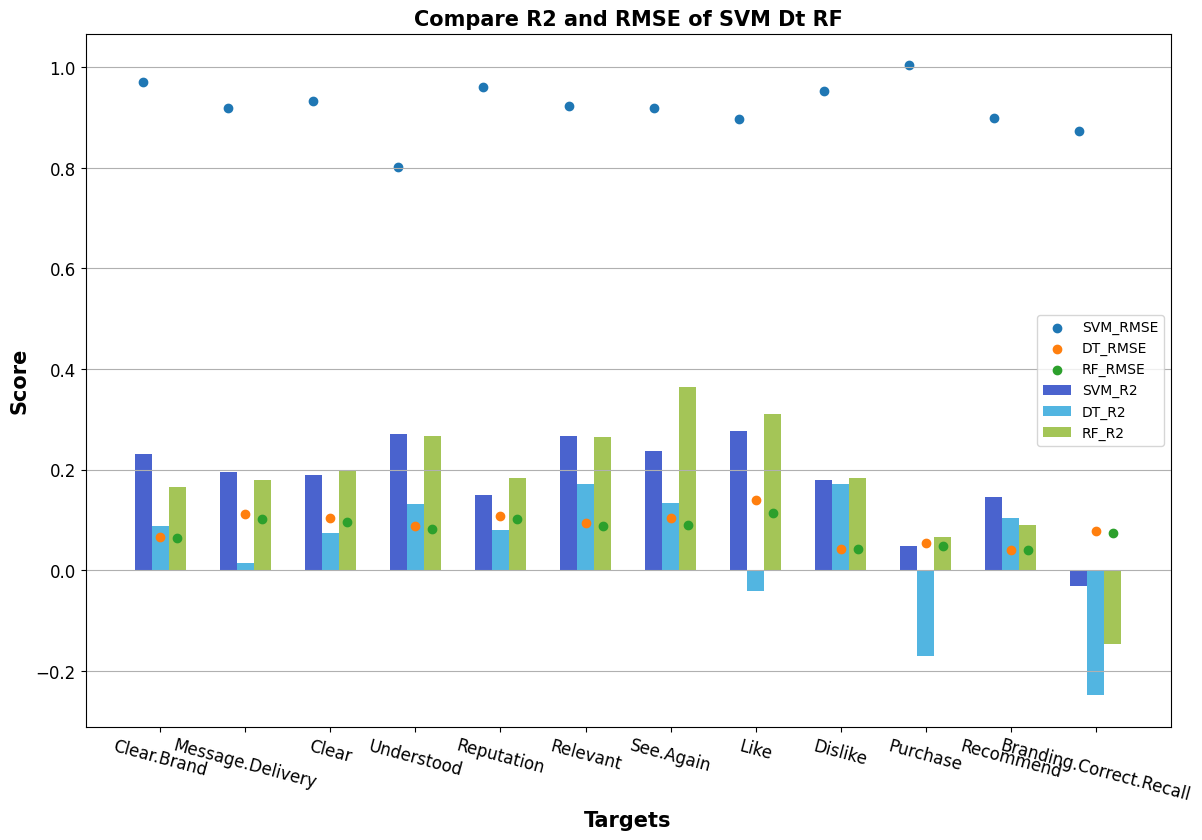

In [15]:
SVM_reg_df = pd.read_csv("./result/SVM_regression.csv")
DT_reg_df = pd.read_csv("./result/DT_optimized_regression.csv")
RF_reg_df = pd.read_csv("./result/RF_optimized_regression.csv")
labels = np.array(list(SVM_reg_df["Target"]))
x = np.array(range(12))

r2_svm = np.array(list(SVM_reg_df["R_squared_test"]))
r2_dt = np.array(list(DT_reg_df["R_squared_test"]))
r2_rf = np.array(list(RF_reg_df["R_squared_test"]))

rmse_svm = np.array(list(SVM_reg_df["RMSE_test"]))
rmse_dt = np.array(list(DT_reg_df["RMSE_test"]))
rmse_rf = np.array(list(RF_reg_df["RMSE_test"]))
fig = plt.figure(figsize=(14, 9))

plt.bar(x-0.2, r2_svm, label="SVM_R2", width=0.2, color="#4A63CE")
plt.bar(x, r2_dt, label="DT_R2", width=0.2, color="#52B5E1")
plt.bar(x+0.2, r2_rf, label="RF_R2", width=0.2, color="#A4C557")

plt.scatter(x-0.2, rmse_svm, label="SVM_RMSE")
plt.scatter(x, rmse_dt, label="DT_RMSE")
plt.scatter(x+0.2, rmse_rf, label="RF_RMSE")

plt.title("Compare R2 and RMSE of SVM DT RF", fontdict={"size":15}, weight="bold")
plt.xlabel("Targets", fontdict={"size":15}, weight="bold")
plt.ylabel("Score", fontdict={"size":15}, weight="bold")
plt.xticks(fontsize=12, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度字体大小


plt.grid(axis="y")
plt.legend(loc="right")
# plt.savefig('./plots/R_squared_contrast.png')
plt.show()


## Part2. Analyze results of three types of classification models applied in predicting ads effectiveness 

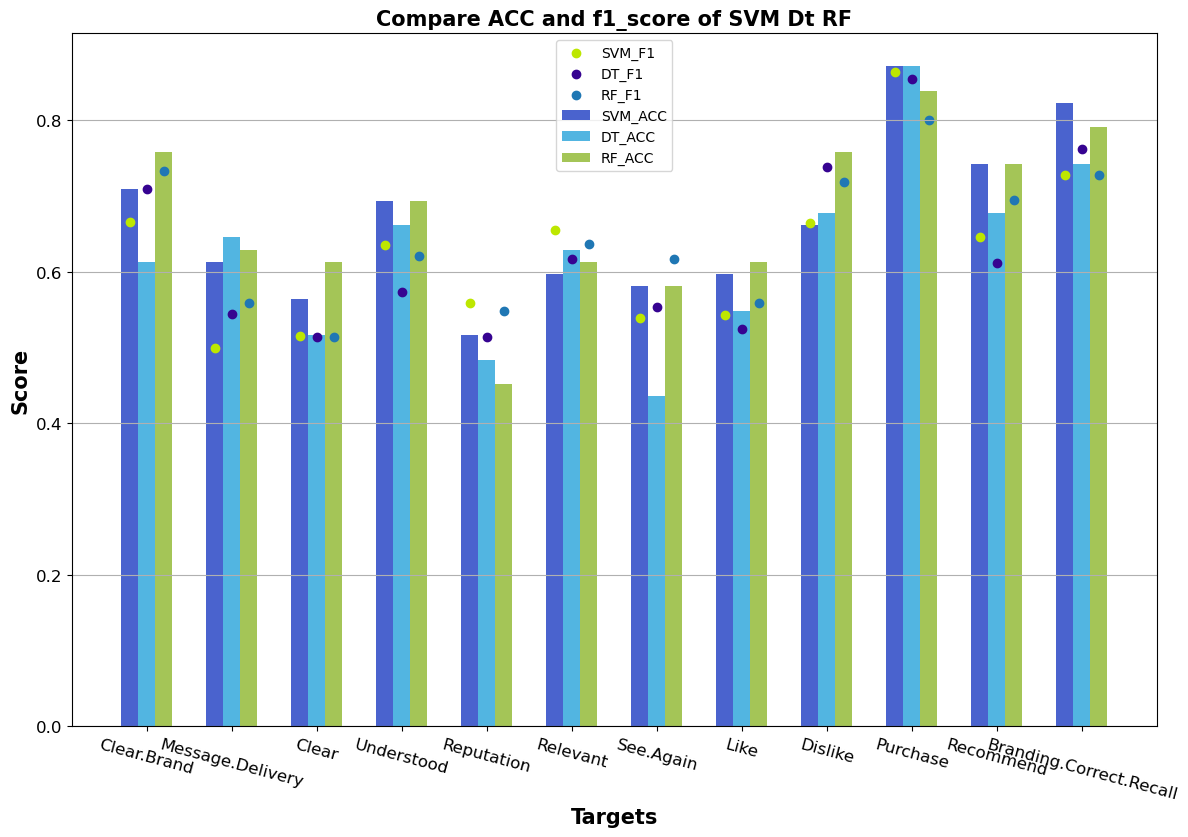

In [2]:
SVM_cla_df = pd.read_csv("./result/SVM_classification.csv")
DT_cla_df = pd.read_csv("./result/DT_optimized_classification.csv")
RF_cla_df = pd.read_csv("./result/RF_optimized_classification.csv")
labels = np.array(list(SVM_cla_df["Target"]))
x = np.array(range(12))

acc_svm = np.array(list(SVM_cla_df["acc_test"]))
acc_dt = np.array(list(DT_cla_df["acc_test"]))
acc_rf = np.array(list(RF_cla_df["acc_test"]))

f1_svm = np.array(list(SVM_cla_df["f1_score"]))
f1_dt = np.array(list(DT_cla_df["f1_score"]))
f1_rf = np.array(list(RF_cla_df["f1_score"]))
fig = plt.figure(figsize=(14, 9))

plt.bar(x-0.2, acc_svm, label="SVM_ACC", width=0.2, color="#4A63CE")
plt.bar(x, acc_dt, label="DT_ACC", width=0.2, color="#52B5E1")
plt.bar(x+0.2, acc_rf, label="RF_ACC", width=0.2, color="#A4C557")

plt.scatter(x-0.2, f1_svm, label="SVM_F1", color="#BDE700")
plt.scatter(x, f1_dt, label="DT_F1", color="#360391")
plt.scatter(x+0.2, f1_rf, label="RF_F1")

plt.title("Compare ACC and f1_score of SVM DT RF", fontdict={"size":15}, weight="bold")
plt.xlabel("Targets", fontdict={"size":15}, weight="bold")
plt.ylabel("Score", fontdict={"size":15}, weight="bold")
plt.xticks(fontsize=12, ticks=x, labels=labels, rotation=-15)  # 设置x轴刻度字体大小
plt.yticks(fontsize=12)  # 设置y轴刻度字体大小


plt.grid(axis="y")
plt.legend(loc="upper center")
# plt.savefig('./plots/R_squared_contrast.png')
plt.show()

## Part3. Draw scatter plot to display the correlation between CI(Reputation/Relevant/Like/Branding Correct Recall) and factor occurrence frequency.

In [2]:
occurrence = pd.read_csv("./result/occurrence.csv") #read the data of features occurrence
feature_importance = pd.read_csv("./result/feature_importanceT.csv") #read the data of features importance

In [22]:
CI = feature_importance[(feature_importance["Reputation"] > 0) | (feature_importance["Relevant"] > 0) | (feature_importance["Like"] > 0) | (feature_importance["Branding.Correct.Recall"] > 0)]
CI

,Feature,Clear.Brand,Message.Delivery,Clear,Understood,Reputation,Relevant,See.Again,Like,Dislike,Purchase,Recommend,Branding.Correct.Recall
0,People,0.0012,0.0024,0.0013,0.0023,-0.0002,0.0014,0.0024,0.0013,0.0002,0.0005,0.0006,0.0004
1,Female,0.0001,0.0011,0.0004,0.0004,0.0018,0.0002,0.0014,0.0020,0.0000,0.0001,0.0002,-0.0003
2,Male,0.0000,0.0004,-0.0002,0.0000,0.0011,0.0003,0.0007,0.0005,0.0004,0.0002,0.0010,0.0025
4,Male.Celebrity,-0.0011,-0.0035,-0.0072,-0.0036,-0.0006,-0.0037,-0.0043,-0.0003,0.0000,-0.0066,-0.0046,0.0001
5,Child,0.0017,0.0073,0.0057,0.0057,0.0014,0.0035,0.0033,0.0030,-0.0003,-0.0007,0.0009,0.0026
6,Teen,0.0005,-0.0004,0.0013,-0.0001,-0.0003,-0.0007,0.0002,0.0004,0.0002,-0.0020,0.0000,0.0004
7,Elderly,-0.0021,-0.0003,-0.0015,-0.0018,0.0059,0.0005,0.0012,0.0027,-0.0020,-0.0018,0.0013,-0.0047
8,Multiple.Ethnicities,0.0011,0.0028,0.0012,0.0028,0.0021,0.0005,0.0026,0.0033,0.0006,0.0015,0.0021,0.0041
9,Ethnic.Minority,0.0006,0.0039,0.0030,0.0050,-0.0001,0.0013,0.0041,0.0051,0.0002,-0.0001,0.0000,0.0029
10,Disability.Representation,0.0018,-0.0018,-0.0022,0.0010,-0.0019,0.0024,0.0096,0.0132,-0.0006,0.0014,0.0028,0.0000


In [41]:
scaler = preprocessing.MinMaxScaler()
scaler_data = scaler.fit_transform(np.array(CI[["Reputation","Relevant","Like","Branding.Correct.Recall"]]))
feature_importance = scaler_data.mean(axis=1)

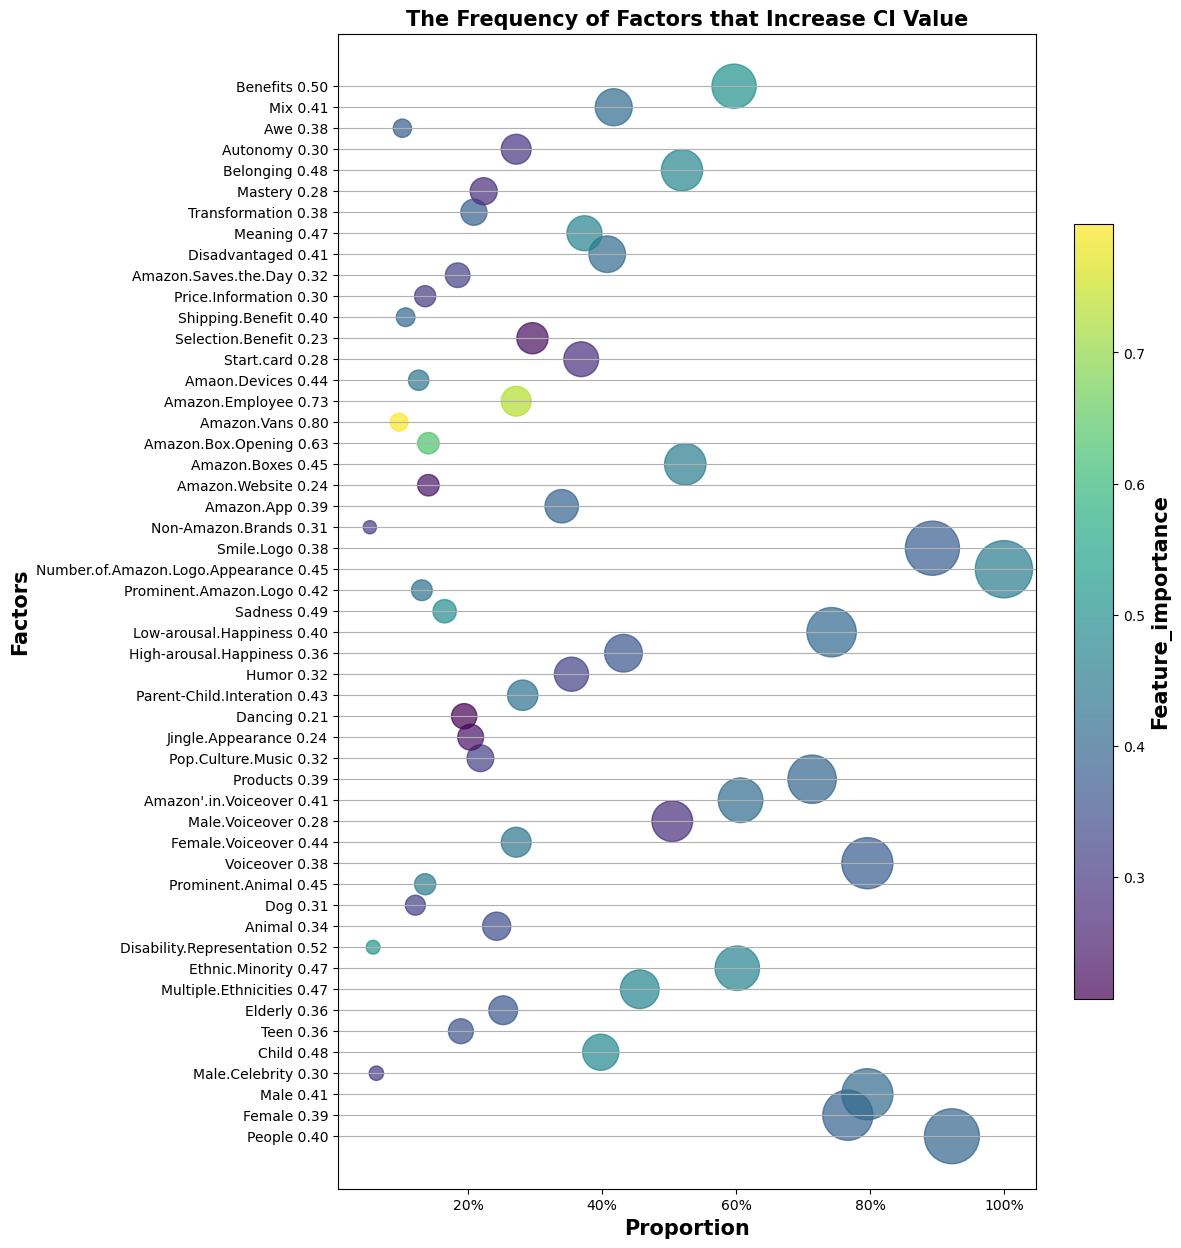

In [55]:
Y = np.array(CI["Feature"])
X = np.array([ occurrence[occurrence["Feature"] == i]["Propotion"].values[0] for i in Y ])
Y = [Y[i]+" "+str("%.2f"%feature_importance[i]) for i in range(len(Y)) ]
color = feature_importance
size = X*1700

fig, ax = plt.subplots(figsize=(10, 15))
plt.title("The Frequency of Factors that Increase CI Value", fontdict={"size":15}, weight="bold")
plt.ylabel("Factors", fontdict={"size":15}, weight="bold")
plt.xlabel("Proportion", fontdict={"size":15}, weight="bold")
plt.grid(axis='y')

ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))

plt.scatter(X,Y, s=size, c=color, cmap="viridis", alpha=0.7)

cbar = plt.colorbar(fraction=0.05)
cbar.set_label('Feature_importance', fontsize=15, weight="bold")
# cbar.ax.set_yticklabels(["0%",'20%','40%','60%','80%','100%'])
plt.show()
